In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

In [2]:
titanic_df = pd.read_csv('tested.csv')

In [3]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [4]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])

In [5]:
imputer = SimpleImputer(strategy='mean')
titanic_df[['Age', 'Fare']] = imputer.fit_transform(titanic_df[['Age', 'Fare']])

In [6]:
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_df)

In [7]:
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(titanic_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

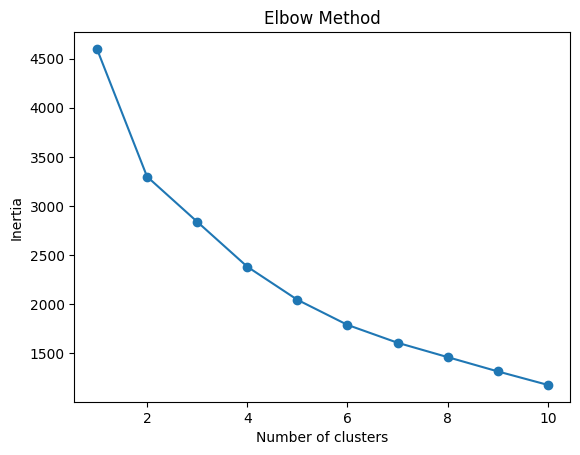

In [8]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(titanic_scaled)
cluster_labels = kmeans.labels_

C:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
silhouette_avg = silhouette_score(titanic_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.31207256143582307


In [11]:
titanic_df['Cluster'] = cluster_labels

In [12]:
cluster_distribution = titanic_df['Cluster'].value_counts(normalize=True)
print("\nCluster Distribution:")
print(cluster_distribution)


Cluster Distribution:
Cluster
1    0.488038
0    0.363636
2    0.148325
Name: proportion, dtype: float64


In [13]:
cluster_characteristics = titanic_df.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_characteristics)


Cluster Characteristics:
         Survived    Pclass        Age     SibSp     Parch       Fare  \
Cluster                                                                 
0             1.0  2.144737  30.272400  0.565789  0.598684  49.747699   
1             0.0  2.441176  29.511784  0.367647  0.274510  20.843862   
2             0.0  1.983871  32.776355  0.419355  0.274194  49.651077   

         Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Cluster                                                            
0               1.0       0.0    0.263158    0.157895    0.578947  
1               0.0       1.0    0.000000    0.107843    0.892157  
2               0.0       1.0    1.000000    0.000000    0.000000  
